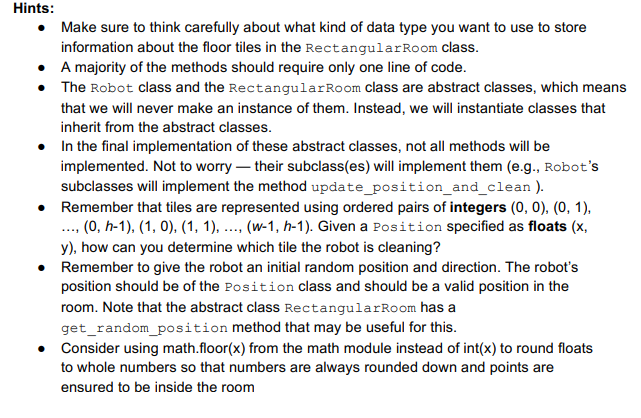

In [ ]:
# -*- coding: utf-8 -*-
# Problem Set 3: Simulating robots
# Name:
# Collaborators (discussion):
# Time:
!export MPLBACKEND=TKAgg

import math
import random
import ps3_visualize
import pylab
import numpy as np

# For python 2.7:
from ps3_verify_movement27 import test_robot_movement


# === Provided class Position
class Position(object):
    """
    A Position represents a location in a two-dimensional room, where
    coordinates are given by floats (x, y).
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
        
    def get_x(self):
        return self.x
    
    def get_y(self):
        return self.y
    
    def get_new_position(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: float representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.get_x(), self.get_y()
        
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        
        return Position(new_x, new_y)

    def __str__(self):  
        return "Position: " + str(math.floor(self.x)) + ", " + str(math.floor(self.y))


# === Problem 1
class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. Each tile
    has some fixed amount of dirt. The tile is considered clean only when the amount
    of dirt on this tile is 0.
    """
    def __init__(self, width, height, dirt_amount):
        """
        Initializes a rectangular room with the specified width, height, and 
        dirt_amount on each tile.

        width: an integer > 0
        height: an integer > 0
        dirt_amount: an integer >= 0
        """
        if width <= 0 or height <=0 or dirt_amount < 0:
          raise ValueError("Incorret parameter values")

        tiles = dict()
        tile_list = list()

        for x in range(0, width):
          for y in range(0, height):
            tile_list.append((x,y))
        for x_y in tile_list:
          tiles[x_y] = dirt_amount

        self.width = width
        self.height = height
        self.tiles = tiles
    
    def clean_tile_at_position(self, pos, capacity):
        """
        Mark the tile under the position pos as cleaned by capacity amount of dirt.

        Assumes that pos represents a valid position inside this room.

        pos: a Position object
        capacity: the amount of dirt to be cleaned in a single time-step
                  can be negative which would mean adding dirt to the tile

        Note: The amount of dirt on each tile should be NON-NEGATIVE.
              If the capacity exceeds the amount of dirt on the tile, mark it as 0.
        """
        cleaned = True



    def is_tile_cleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer
        
        Returns: True if the tile (m, n) is cleaned, False otherwise

        Note: The tile is considered clean only when the amount of dirt on this
              tile is 0.
        """
        raise NotImplementedError

    def get_num_cleaned_tiles(self):
        """
        Returns: an integer; the total number of clean tiles in the room
        """
        raise NotImplementedError
        
    def is_position_in_room(self, pos):
        """
        Determines if pos is inside the room.

        pos: a Position object.
        Returns: True if pos is in the room, False otherwise.
        """
        raise NotImplementedError
        
    def get_dirt_amount(self, m, n):
        """
        Return the amount of dirt on the tile (m, n)
        
        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer

        Returns: an integer
        """
        raise NotImplementedError
        
    def get_num_tiles(self):
        """
        Returns: an integer; the total number of tiles in the room
        """
        # do not change -- implement in subclasses.
        return self.width * self.height 
        
    def is_position_valid(self, pos):
        """
        pos: a Position object.
        
        returns: True if pos is in the room and (in the case of FurnishedRoom) 
                 if position is unfurnished, False otherwise.
        """
        # do not change -- implement in subclasses
        raise NotImplementedError         

    def get_random_position(self):
        """
        Returns: a Position object; a random position inside the room
        """
        # do not change -- implement in subclasses
        raise NotImplementedError        


class Robot(object):
    """
    Represents a robot cleaning a particular room.

    At all times, the robot has a particular position and direction in the room.
    The robot also has a fixed speed and a fixed cleaning capacity.

    Subclasses of Robot should provide movement strategies by implementing
    update_position_and_clean, which simulates a single time-step.
    """
    def __init__(self, room, speed, capacity):
        """
        Initializes a Robot with the given speed and given cleaning capacity in the 
        specified room. The robot initially has a random direction and a random 
        position in the room.

        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        capacity: a positive interger; the amount of dirt cleaned by the robot 
                  in a single time-step
        """
        raise NotImplementedError

    def get_robot_position(self):
        """
        Returns: a Position object giving the robot's position in the room.
        """
        raise NotImplementedError

    def get_robot_direction(self):
        """
        Returns: a float d giving the direction of the robot as an angle in
        degrees, 0.0 <= d < 360.0.
        """
        raise NotImplementedError

    def set_robot_position(self, position):
        """
        Set the position of the robot to position.

        position: a Position object.
        """
        raise NotImplementedError

    def set_robot_direction(self, direction):
        """
        Set the direction of the robot to direction.

        direction: float representing an angle in degrees
        """
        raise NotImplementedError

    def update_position_and_clean(self):
        """
        Simulate the raise passage of a single time-step.

        Move the robot to a new random position (if the new position is invalid, 
        rotate once to a random new direction, and stay stationary) and mark the tile it is on as having
        been cleaned by capacity amount. 
        """
        # do not change -- implement in subclasses
        raise NotImplementedError

In [ ]:
# Test suite for Problem Set 3 (Simulating Robots)
# Fall 2016

import sys
import threading
import traceback
import unittest
import random
import imp

test = imp.load_compiled("test", "test.pyc")


def xyrange(x_upper_bound, y_upper_bound):
    """ Returns the cartesian product of range(x_upper_bound) and range(y_upper_bound).
        Useful for iterating over the tuple coordinates of a room
    """
    for x in range(x_upper_bound):
        for y in range(y_upper_bound):
            yield (x, y) # these are the room tile xy tuples 

class ps3_P1A(unittest.TestCase):
    """test the RectangularRoom abstract base class"""    
    def test_unimplemented_methods(self):
        """Test if student implemented methods in RectangularRoom abstract class that should not be implemented"""
        room = ps3.RectangularRoom(2,2,1)
        self.assertRaises(NotImplementedError, room.get_num_tiles)
        pos = test.Position(1,1)
        self.assertRaises(NotImplementedError, room.is_position_valid, pos)
        self.assertRaises(NotImplementedError, room.get_random_position)

    def test_room_dirt_dirty(self):
        """ 
        Can fail either because get_dirt_amount is working incorrectly 
        OR the student is initializing the dirt amount incorrectly
        """
        width, height, dirt_amount = (3, 4, 1)   
        room = ps3.RectangularRoom(width, height, dirt_amount)
        for x, y in xyrange(width, height):            
            self.assertEquals(room.get_dirt_amount(x, y),dirt_amount,
                             "Tile {} was not initialized with correct dirt amount".format((x, y))
                             )
                             
    def test_room_dirt_clean(self):
        """ 
        Can fail either because get_dirt_amount is working incorrectly 
        OR the student is initializing the dirt amount incorrectly
        """
        width, height, dirt_amount = (3, 4, 0)      
        room = ps3.RectangularRoom(width, height, dirt_amount)
        for x, y in xyrange(width, height):            
            self.assertEquals(room.get_dirt_amount(x, y),dirt_amount,
                             "Tile {} was not initialized with correct dirt amount".format((x, y))
                             )

    def test_is_tile_cleaned_dirty(self):
        """ Test is_tile_cleaned"""
        width, height, dirt_amount = (3, 4, 1)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        # Check all squares are unclean at start, given initial dirt > 1
        for x, y in xyrange(width, height):
            self.assertFalse(room.is_tile_cleaned(x, y),
                             "Unclean tile {} was returned as clean".format((x, y))
                             )
    
    def test_is_tile_cleaned_clean(self):
        """ Test is_tile_cleaned"""
        width, height, dirt_amount = (3, 4, 0)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        # Check all squares are unclean at start, given initial dirt > 1
        for x, y in xyrange(width, height):
            self.assertTrue(room.is_tile_cleaned(x, y),
                             "Unclean tile {} was returned as clean".format((x, y))
                             )

    def test_clean_tile_at_position_PosToZero(self):
        """ Test if clean_tile_at_position removes all dirt"""
        width, height, dirt_amount = (3, 4, 1)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        # Clean the tiles and confirm they are marked as clean
        for x, y in xyrange(width, height):
            room.clean_tile_at_position(test.Position(x + random.random(), y + random.random()), dirt_amount) 
                # using random.random in case there is any issue with specific parts of a tile
        for x, y in xyrange(width, height):
            self.assertTrue(room.is_tile_cleaned(x, y),
                            "Clean tile {} was not marked clean".format((x, y))
                            )

    def test_clean_tile_at_position_PosToPos(self):
        """ Test if clean_tile_at_position removes all dirt"""
        width, height, dirt_amount = (3, 4, 2)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        # Clean the tiles and confirm they are marked as clean
        for x, y in xyrange(width, height):
            room.clean_tile_at_position(test.Position(x + random.random(), y + random.random()), dirt_amount - 1) 
                # using random.random in case there is any issue with specific parts of a tile
        for x, y in xyrange(width, height):
            self.assertFalse(room.is_tile_cleaned(x, y),
                            "Unclean tile {} was marked clean".format((x, y))
                            )

    def test_clean_tile_at_position_ZeroToZero(self):
        """ Test if clean_tile_at_position removes all dirt"""
        width, height, dirt_amount = (3, 4, 0)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        # Clean the tiles and confirm they are marked as clean
        for x, y in xyrange(width, height):
            room.clean_tile_at_position(test.Position(x + random.random(), y + random.random()), 1) 
                # using random.random in case there is any issue with specific parts of a tile
        for x, y in xyrange(width, height):
            self.assertTrue(room.is_tile_cleaned(x, y),
                            "Clean tile {} was marked clean, no negative dirt allowed".format((x, y))
                            )
    
    def test_get_num_cleaned_tiles_FullIn1(self):
        "Test get_num_cleaned_tiles for cleaning subset of room completely with 1 call"
        width, height, dirt_amount = (3, 4, 1)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        cleaned_tiles = 0
        # Clean some tiles
        for x, y in xyrange(width-1, height-1):
            room.clean_tile_at_position(test.Position(x + random.random(), y + random.random()), 1)
            cleaned_tiles += 1
            num_cleaned = room.get_num_cleaned_tiles()
            self.assertEqual(num_cleaned, cleaned_tiles,
                            "Number of clean tiles is incorrect: expected {}, got {}".format(cleaned_tiles, num_cleaned)
                            )

    def test_get_num_cleaned_tiles_Partial(self):
        "Test get_num_cleaned_tiles for cleaning subset of room incompletely"
        width, height, dirt_amount = (3, 4, 2)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        cleaned_tiles = 0
        # Clean some tiles
        for x, y in xyrange(width-1, height-1):
            room.clean_tile_at_position(test.Position(x + random.random(), y + random.random()), 1)
            num_cleaned = room.get_num_cleaned_tiles()
            self.assertEqual(num_cleaned, cleaned_tiles,
                            "Number of clean tiles is incorrect: expected {}, got {}".format(cleaned_tiles, num_cleaned)
                            )

    def test_get_num_cleaned_tiles_FullIn2(self):
        """Test get_num_cleaned_tiles for cleaning subset of room in two calls"""
        width, height, dirt_amount = (3, 4, 2)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        cleaned_tiles = 0
        # Clean some tiles
        for x, y in xyrange(width-1, height-1):
            room.clean_tile_at_position(test.Position(x + random.random(), y + random.random()), 1)
            room.clean_tile_at_position(test.Position(x + random.random(), y + random.random()), 1)
            cleaned_tiles += 1
            num_cleaned = room.get_num_cleaned_tiles()
            self.assertEqual(num_cleaned, cleaned_tiles,
                             "Number of clean tiles is incorrect: expected {}, got {}".format(cleaned_tiles, num_cleaned)
                             )

    def test_get_num_cleaned_tiles_OverClean(self):
        "Test cleaning already clean tiles does not increment counter"
        width, height, dirt_amount = (3, 4, 2)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        # clean all of the tiles in the room        
        for x, y in xyrange(width, height):
            room.clean_tile_at_position(test.Position(x + random.random(), y + random.random()), dirt_amount)
        for x, y in xyrange(width, height):
            room.clean_tile_at_position(test.Position(x + random.random(), y + random.random()), 1)
            num_cleaned = room.get_num_cleaned_tiles()
            self.assertEqual(num_cleaned, width * height,
                             "Number of clean tiles is incorrect: re-cleaning cleaned tiles must not increase number of cleaned tiles"
                             )

    def test_is_position_in_room(self):
        "Test is_position_in_room"
        width, height, dirt_amount = (3, 4, 2)
        room = ps3.RectangularRoom(width, height, dirt_amount)
        solution_room = test.RectangularRoom(width, height, dirt_amount)

        for x in [0.0, -0.1, width - 0.1, width, width + 0.1]:
            for y in [0.0, -0.1, height - 0.1, height, height + 0.1]:
                pos = test.Position(x, y)
                self.assertEquals(solution_room.is_position_in_room(pos),room.is_position_in_room(pos),
                                  "position {},{} is incorrect: expected {}, got {}".format(x, y, solution_room.is_position_in_room(pos), room.is_position_in_room(pos))
                                  )

# class ps3_P1B(unittest.TestCase):
#     """test the Robot abstract base class"""
#     def test_unimplemented_methods(self):
#         """Test if student implemented methods in Robot abstract class that should not be implemented"""
#         room = test.EmptyRoom(2,2,1)
#         robot = ps3.Robot(room,1,1)
#         self.assertRaises(NotImplementedError, robot.update_position_and_clean)
    
#     def test_getset_robot_direction(self):
#         """Test get_robot_direction and set_robot_direction"""
#         # instantiate EmptyRoom from solutions for testing
#         width, height, dirt_amount = (3, 4, 2)
#         solution_room = test.EmptyRoom(width, height, dirt_amount)

#         robots = [ps3.Robot(solution_room, 1.0, 1) for i in range(4)]
#         directions = [1, 333, 105, 75, 74.3]
#         for dir_index, robot in enumerate(robots):
#             robot.set_robot_direction(directions[dir_index])
#         for dir_index, robot in enumerate(robots):
#             robot_dir = robot.get_robot_direction()
#             self.assertEquals(robot_dir, directions[dir_index],
#                               "Robot direction set or retrieved incorrectly: expected {}, got {}".format(directions[dir_index], robot_dir)
#                               )
        
# class ps3_P2_ER(unittest.TestCase):
#     """test the EmptyRoom subclass"""
#     def test_get_random_position(self):
#         """Test get_random_position
#             checks for distribution of positions and validity of positions
#         """
#         width, height, dirt_amount = (5, 10, 1)
#         room = ps3.EmptyRoom(width, height, dirt_amount)
#         sol_room = test.EmptyRoom(width, height, dirt_amount)
#         freq_buckets = {}
#         for i in range(50000):
#             pos = room.get_random_position()
#             # confirm from test that this is a valid position
#             self.assertTrue(sol_room.is_position_valid(pos)) 
#             try:
#                 x, y = pos.get_x(), pos.get_y()
#             except AttributeError:
#                 self.fail("get_random_position returned {} which is not a Position".format(pos))
#             self.assertTrue(0 <= x < width and 0 <= y < height,
#                             "get_random_position returned {} which is not in [0, {}), [0, {})".format(pos,width,height))
#             x0, y0 = int(x), int(y)
#             freq_buckets[(x0, y0)] = freq_buckets.get((x0, y0), 0) + 1
#         for t in xyrange(width, height):
#             num_in_bucket = freq_buckets.get(t, 0)
#             self.assertTrue(
#                 # This is a 99.7% confidence interval for a uniform
#                 # distribution. Fail if the total of any bucket falls outside
#                 # this range.
#                 865 < num_in_bucket < 1135,
#                 "The distribution of positions from get_random_position "
#                 "looks incorrect (it should be uniform)")
    
#     def test_get_num_tiles(self):
#         """ test get_num_tiles method"""
#         for i in range(10):        
#             width, height, dirt_amount = (random.randint(1,10), random.randint(1,10), 1)
#             room_num_tiles = ps3.EmptyRoom(width, height, dirt_amount).get_num_tiles()
#             sol_room_tiles = ps3.EmptyRoom(width, height, dirt_amount).get_num_tiles()
#             self.assertEquals(room_num_tiles, sol_room_tiles,
#                              "student code number of room tiles = {}, not equal to solution code num tiles {}".format(room_num_tiles, sol_room_tiles)
#                              )
    
#     def test_is_position_valid(self):
#         """ Test is_position_valid
#             this should be refactored as it's mostly a copy of is_position_in_room code        
#         """
#         width, height, dirt_amount = (3, 4, 2)
#         room = ps3.EmptyRoom(width, height, dirt_amount)
#         solution_room = test.EmptyRoom(width, height, dirt_amount)

#         for x in [0.0, -0.1, width - 0.1, width, width + 0.1]:
#             for y in [0.0, -0.1, height - 0.1, height, height + 0.1]:
#                 pos = test.Position(x, y)
#                 self.assertEquals(solution_room.is_position_valid(pos), room.is_position_valid(pos),
#                              "student code and solution code disagree on whether position is valid"
#                                   )

# class ps3_P2_FR(unittest.TestCase):                  
#     """tests the FurnishedRoom subclass """
#     def test_is_tile_furnished(self):
#         """ test is_tile_furnished """        
#         for trial in range(5):
#             width, height, dirt_amount = (random.randint(2, 8), random.randint(2, 8), 1)
#             # create room using student's class, set furniture tiles for solution class
#             room = ps3.FurnishedRoom(width, height, dirt_amount)
#             room.add_furniture_to_room()
#             sol_room = test.FurnishedRoom(width, height, dirt_amount)
#             # this relies on knowing the underlying details of the class
#             sol_room.furniture_tiles = room.furniture_tiles 
#             for x,y in xyrange(width,height):
#                 self.assertEquals(room.is_tile_furnished(x,y),sol_room.is_tile_furnished(x,y),
#                                   "student code and solution code disagree on whether tile is furnished"
#                                   )
    
#     def test_is_position_furnished(self):
#         """ test_is_position_furnished """        
#         for trial in range(5):
#             width, height, dirt_amount = (random.randint(2, 8), random.randint(2, 8), 1)
#             # create room using student's class, set furniture tiles for solution class
#             room = ps3.FurnishedRoom(width, height, dirt_amount)
#             room.add_furniture_to_room()
#             sol_room = test.FurnishedRoom(width, height, dirt_amount)
#             # this relies on knowing the underlying details of the class
#             sol_room.furniture_tiles = room.furniture_tiles 
#             for x,y in xyrange(width,height):
#                 pos = test.Position(x + random.random(), y + random.random())
#                 self.assertEquals(room.is_position_furnished(pos),sol_room.is_position_furnished(pos),
#                                   "student code and solution code disagree on whether position is furnished"
#                                   )
    
#     def test_is_position_valid(self):
#         """ Test is_position_valid
#         """
#         for trial in range(5):
#             width, height, dirt_amount = (3, 4, 2)
#             room = ps3.FurnishedRoom(width, height, dirt_amount)
#             room.add_furniture_to_room()
#             sol_room = test.FurnishedRoom(width, height, dirt_amount)
#             sol_room.furniture_tiles = room.furniture_tiles 
    
#             for x in [0.0, -0.1, width - 0.1, width, width + 0.1, room.furniture_tiles[0][0] + 0.3]:
#                 for y in [0.0, -0.1, height - 0.1, height, height + 0.1, room.furniture_tiles[0][1] + 0.3]:
#                     pos = test.Position(x, y)
#                     self.assertEquals(sol_room.is_position_valid(pos), room.is_position_valid(pos),
#                                       "student code and solution code disagree on whether position is valid"
#                                       )
    
#     def test_get_num_tiles(self):
#         """ test get_num_tiles method
#             should refactor - is mostly copy of EmptyRoom test        
#         """
#         for i in range(10):        
#             width, height, dirt_amount = (random.randint(2,10), random.randint(2,10), 1)
#             # instanciate student's room
#             room = ps3.FurnishedRoom(width, height, dirt_amount)
#             room.add_furniture_to_room()
#             # instanciate solution's room based on student's furniture
#             sol_room = ps3.FurnishedRoom(width, height, dirt_amount)
#             sol_room.furniture_tiles = room.furniture_tiles 
#             # generate answers
#             room_num_tiles = room.get_num_tiles()
#             sol_room_num_tiles = sol_room.get_num_tiles()
#             self.assertEquals(room_num_tiles, sol_room_num_tiles,
#                              "student code number of room tiles = {}, not equal to solution code num tiles {}".format(room_num_tiles, sol_room_num_tiles)
#                              )
    
#     def test_get_random_position(self):
#         """Test get_random_position for FurnishedRoom
#            tests for validity of positions - could add distribution checking similar to empty room
#         """
#         width, height, dirt_amount = (5, 10, 1)
#         # instanciate student's room
#         room = ps3.FurnishedRoom(width, height, dirt_amount)
#         room.add_furniture_to_room()
#         # instanciate solution's room based on student's furniture
#         sol_room = ps3.FurnishedRoom(width, height, dirt_amount)
#         sol_room.furniture_tiles = room.furniture_tiles 
#         for i in range(50000):
#             pos = room.get_random_position()
#             self.assertTrue(sol_room.is_position_valid(pos)) 
    
# class ps3_P3(unittest.TestCase):
#     """This  tests EmptyRoom and Standard robot in various ways"""
#     def createRoomAndRobots(self, num_robots):
#         r = ps3.EmptyRoom(5, 7, 1)
#         robots = [ps3.StandardRobot(r, 1.0, 1) for i in range(num_robots)]
#         return r, robots

#     def test_BoundaryConditions(self):
#         "Test strict inequalities in random positions for the EmptyRoom and StandardRobot"
#         for m in range(7000):
#             r, robots = self.createRoomAndRobots(4)
#             for r in robots:
#                 p = r.get_robot_position()
#                 d = r.get_robot_direction()
#                 try:
#                     x, y = p.get_x(), p.get_y()
#                 except AttributeError:
#                     self.fail("get_robot_position returned %r which is not a Position" % (p,))
#                 self.assertTrue(x < 5 and y < 7,
#                                 "Robot position was set to %r, "
#                                 "which is not in [0, 5), [0, 7)" %
#                                 ((p.get_x(), p.get_y()),))
#                 self.assertTrue(0 <= d < 360,
#                                 "Robot direction was set to %r, "
#                                 "which is not in [0, 360)" % (d,))

#     def testRobot(self):
#         "Test StandardRobot"
#         pos_buckets = {}
#         dir_buckets = {}
#         skip_pos_distribution_test = False
#         for m in range(7000):
#             r, robots = self.createRoomAndRobots(4)
#             for r in robots:
#                 p = r.get_robot_position()
#                 d = r.get_robot_direction()
#                 try:
#                     x, y = p.get_x(), p.get_y()
#                 except AttributeError:
#                     self.fail("get_robot_position returned %r which is not a Position" % (p,))
#                 self.assertTrue(0 <= x <= 5 and 0 <= y <= 7,
#                                 "Robot position was set to %r, "
#                                 "which is not in [0, 5), [0, 7)" %
#                                 ((p.get_x(), p.get_y()),))
#                 self.assertTrue(0 <= d <= 360,
#                                 "Robot direction was set to %r, "
#                                 "which is not in [0, 360)" % (d,))
#                 x0, y0 = int(p.get_x()), int(p.get_y())
#                 pos_buckets[(x0, y0)] = pos_buckets.get((x0, y0), 0) + 1
#                 dir_buckets[int(d / 10)] = dir_buckets.get(int(d / 10), 0) + 1
#         # Test that positions are correctly distributed
#         if not skip_pos_distribution_test:
#             for t in xyrange(5, 7):
#                 num_in_bucket = pos_buckets.get(t, 0)
#                 self.assertTrue(
#                     685 < num_in_bucket < 915,
#                     "The distribution of positions on new Robot objects "
#                     "looks incorrect (it should be uniform)")
                    
#         # Test that directions are correctly distributed
#         for t in range(36):
#             num_in_bucket = dir_buckets.get(t, 0)
#             self.assertTrue(
#                 658 < num_in_bucket < 898,
#                 "The distribution of positions from get_random_position "
#                 "looks incorrect (it should be uniform)")

#     def test_update_position_and_cleanStandardRobot(self):
#         "Test StandardRobot.update_position_and_clean"
#         r = ps3.EmptyRoom(3, 5, 1)
#         robot = ps3.StandardRobot(r, 1.0, 1)
#         robot.set_robot_position(test.Position(1.5, 2.5))
#         robot.set_robot_direction(90)
#         robot.update_position_and_clean()
#         self.assertEquals(robot.get_robot_direction(), 90,
#                           "Robot direction is updated incorrectly by update_position_and_clean: expected %r, got %r" %
#                           (90, robot.get_robot_direction()))
#         # check if robot position is valid
#         robotPos = robot.get_robot_position()
#         correctPos = test.Position(2.5, 2.5)
#         self.assertTrue(robotPos.get_x() == correctPos.get_x() and robotPos.get_y() == correctPos.get_y(),
#                           "Robot position is updated incorrectly by update_position_and_clean: expected %r, got %r" %
#                           (ps3.Position(2.5, 2.5), robot.get_robot_position()))
#         self.assertTrue(2>=r.get_num_cleaned_tiles() >= 1,
#                         "update_position_and_clean should have marked one or two tiles as clean")
#         self.assertTrue(r.is_tile_cleaned(1, 2) or r.is_tile_cleaned(2, 2),
#                         "update_position_and_clean should have marked either (1, 2) or (2, 2) as clean")
 
#         # Simulate a lot of time passing...
#         for i in range(20):
#             robot.update_position_and_clean()
#             self.assertTrue(r.is_position_in_room(robot.get_robot_position()),
#                             "Robot position %r is not in room!" % (robot.get_robot_position(),))
#         self.assertNotEquals(robot.get_robot_direction(), 90,
#                           "Robot direction should have been changed in update_position_and_clean")
#         self.assertTrue(r.get_num_cleaned_tiles() >= 1,
#                         "update_position_and_clean should have marked another tile as clean")

# """The SIMULATION_TIME_LIMIT, SimulationThread class and SimulationTester class
#     are all designed to help test various simulations for problems 4 and 5
    
#     Right now there is no testing for the FurnishedRoom simulation, because the 
#     furniture is set up randomly. In future psets it may make sense to manually
#     empirically establish reasonable simulation bounds for specified furniture
#     setups. If the student has implemented the FurnishedRoom methods correctly
#     and passes the tests for StandardRobot and EmptyRoom, there should not be any
#     additional issue.
# """
# SIMULATION_TIME_LIMIT = 75.0

# class SimulationThread(threading.Thread):
#     def __init__(self, *args):
#         threading.Thread.__init__(self)
#         self.result = None
#         self.exception_info = None
#         self.args = args
#     def run(self):
#         try:
#             self.result = ps3.run_simulation(*self.args)
#         except Exception:
#             self.exception_info = sys.exc_info()
#     def getResult(self):
#         return self.result
#     def getExceptionInfo(self):
#         return self.exception_info

# class SimulationTester(unittest.TestCase):
#     def run_simulation(self, bounds, parameters):
#         """
#         Tests ps3.run_simulation.  The number of time-steps
#         ps3.run_simulation takes must fall between any of
#         the (LOWER, UPPER) bound tuples inside bounds.

#         ps3.run_simulation must also finish within a timelimit
#         to be considered passing.  Threads are used to time
#         a simulation.

#         bounds: tuple of (lower, upper) bounds on the number of
#             steps a simulation should take.
#         parameters: parameters to be passed into ps3.run_simulation

#         """
#         thr = SimulationThread(*parameters)
#         # Set daemon flag, so we can quit the test even if simulation threads
#         # are still running
#         thr.setDaemon(True)
#         thr.start()
#         # Allow SIMULATION_TIME_LIMIT seconds for test to finish
#         thr.join(SIMULATION_TIME_LIMIT)
#         if thr.isAlive():
#             self.fail("Simulation took too long (more than %d seconds)" %
#                       SIMULATION_TIME_LIMIT)
#         elif thr.getExceptionInfo():
#             self.fail("Exception occurred in simulation thread:\n\n%s" %
#                       "".join(traceback.format_exception(*thr.getExceptionInfo())))
#         else:
#             actual = thr.getResult()
#             intervals_str = " or ".join([("[%.1f, %.1f]" % b) for b in bounds])
#             self.assertTrue(
#                 any([LB < actual < UB for LB, UB in bounds]),
#                 "Simulation output was outside of 99.7%% confidence interval!\n"
#                 "Robots: %d; Speed: %.1f; Capacity: %d; Dimensions: %dx%d; "
#                 "Dirt Amount: %d; Coverage: %.2f; Trials: %d; Robot type: %r\n"
#                 "Actual output: %r; acceptable intervals: %s"
#                 % (parameters + (actual, intervals_str)))

# class ps3_P5_Standard(SimulationTester):
#     """test the simulation time cleaning the EmptyRoom with a StandardRobot"""
#     def testSimulation1(self):
#         "Test cleaning 100% of a 5x5 room"
#         try:
#             self.run_simulation(((142, 173),), (1, 1.0, 1, 5, 5, 1, 1.0, 100, ps3.StandardRobot))
#         except:
#             print ("Unexpected error:", sys.exc_info()[1])
#             raise
#     def testSimulation2(self):
#         "Test cleaning 75% of a 10x10 room (Standard Robot)"
#         self.run_simulation(((183, 198),), (1, 1.0, 1, 10, 10, 1, 0.75, 100, ps3.StandardRobot))
#     def testSimulation3(self):
#         "Test cleaning 90% of a 10x10 room (Standard Robot)"
#         self.run_simulation(((298, 327),), (1, 1.0, 1, 10, 10, 1, 0.9, 100, ps3.StandardRobot))
#     def testSimulation4(self):
#         "Test multiple robots (95% of a 20x20 room with 5 robots (Standard Robot))"
#         self.run_simulation(((289, 303),), (5, 1.0, 1, 20, 20, 1, 0.95, 100, ps3.StandardRobot))
#     def testSimulation5(self):
#         "Test different speeds (90% of a 5x20 room with a robot of speed 0.2 (Standard Robot))"
#         self.run_simulation(((1095, 1228),), (1, 0.2, 1, 5, 20, 1, 0.9, 100, ps3.StandardRobot))
#     def testSimulation6(self):
#         "Test multiple robots and different speeds (90% of a 10x10 room with 3 robots of speed 0.5 (Standard Robot))"
#         self.run_simulation(((155, 180),), (3, 0.5, 1, 10, 10, 1, 0.9, 100, ps3.StandardRobot))
#     # new tests below here
#     def testSimulation7(self):
#          "Test cleaning 100% of a 5x5 room (Standard Robot, 5 dirt/tile, capcity = 3)"
#          self.run_simulation(((206, 266),(180, 240)), (1, 1.0, 3, 5, 5, 5, 1.0, 100, ps3.StandardRobot))
#     def testSimulation8(self):
#         "Test cleaning 100% of a 5x5 room (Standard Robot, 6 dirt/tile, capacity = 3)"
#         self.run_simulation(((206, 266),(180, 240)), (1, 1.0, 3, 5, 5, 6, 1.0, 100, ps3.StandardRobot))
#     def testSimulation9(self):
#         """Test different speeds (90% of a 3x10 room with a robot of speed 0.2 (Standard Robot)),
#         capacity = 2, 6 dirt/tile"""
#         self.run_simulation(((387, 447),(384, 444)), (1, 0.2, 2, 3, 10, 6, 0.9, 100, ps3.StandardRobot))
#     def testSimulation10(self):
#         "Test multiple robots (95% of a 10x10 room with 5 robots (Standard Robot)) capacity = 2, 6 dirt/tile"
#         self.run_simulation(((137, 198),(130, 190)), (5, 1.0, 2, 10, 10, 6, 0.95, 100, ps3.StandardRobot))
#     def testSimulation11(self):
#         """Test multiple robots and different speeds (90% of a 5x5 room with 3 robots of speed 0.5
#         (Standard Robot)), capacity = 2, 6 dirt/tile"""
#         self.run_simulation(((48, 108), (45, 104)), (3, 0.5, 2, 5, 5, 6, 0.9, 100, ps3.StandardRobot))

# class ps3_P5_Faulty(SimulationTester):
#     """test the simulation time cleaning the EmptyRoom with a FaultyRobot"""
#     def testSimulation1(self):
#         "Test cleaning 100% of a 5x5 room with FaultyRobot"
#         x = ps3.run_simulation(1, 1.0, 1, 5, 5, 1, 1.0, 100, ps3.FaultyRobot)
#         self.assertTrue(125 <= x <= 275,
#                         "Simulation output was outside of 99.7% confidence interval!\n")    
#     def testSimulation2(self):
#         "Test cleaning 75% of a 10x10 room with FaultyRobot"
#         x = ps3.run_simulation(1, 1.0, 1, 10, 10, 1, 0.75, 100, ps3.FaultyRobot)
#         self.assertTrue(210 <= x <=260, "Simulation output was outside of 99.7% confidence interval! Took " + str(x) + " steps\n")
#     def testSimulation3(self):
#         "Test cleaning 90% of a 10x10 room with FaultyRobot"
#         x = ps3.run_simulation(1, 1.0, 1, 10, 10, 1, 0.9, 100, ps3.FaultyRobot)
#         self.assertTrue(360 <= x <=415, "Simulation output was outside of 99.7% confidence interval! Took " + str(x) + " steps\n")
#     def testSimulation4(self):
#         "Test cleaning 100% of a 5x5 room with FaultyRobot"
#         x = ps3.run_simulation(2, 1.0, 2, 5, 5, 5, 1.0, 100, ps3.FaultyRobot)
#         self.assertTrue(160 <= x <=200, "Simulation output was outside of 99.7% confidence interval! Took " + str(x) + " steps\n")
#     def testSimulation5(self):
#         "Test cleaning 75% of a 10x10 room with FaultyRobot"
#         x = ps3.run_simulation(4, 1.0, 3, 10, 10, 5, 0.75, 100, ps3.FaultyRobot)
#         self.assertTrue(101 <= x <=116, "Simulation output was outside of 99.7% confidence interval! Took " + str(x) + " steps\n")
#     def testSimulation6(self):
#         "Test cleaning 90% of a 10x10 room with FaultyRobot"
#         x = ps3.run_simulation(5, 1.0, 3, 10, 10, 10, 0.9, 100, ps3.FaultyRobot)
#         self.assertTrue(205 <= x <=225, "Simulation output was outside of 99.7% confidence interval! Took " + str(x) + " steps\n")

if __name__ == "__main__":
    suite = unittest.TestSuite()
    suite.addTest(unittest.makeSuite(ps3_P1A))
    # suite.addTest(unittest.makeSuite(ps3_P1B))
    # suite.addTest(unittest.makeSuite(ps3_P2_ER))
    # suite.addTest(unittest.makeSuite(ps3_P2_FR))
    # suite.addTest(unittest.makeSuite(ps3_P3))
    # suite.addTest(unittest.makeSuite(ps3_P5_Standard))
    # suite.addTest(unittest.makeSuite(ps3_P5_Faulty))
    # unittest.TextTestRunner(verbosity=3).run(suite)

    


ImportError: ignored

In [ ]:
!pip install imp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement imp (from versions: none)
ERROR: No matching distribution found for imp
